# Signature Classification

## Objectives

This is a capability demonstration to analyze signatures using deep learning with two obejctives: 

1. Detect forged v. real signatures 
  - target: one-hot encoded forged (1) and real (0) signatures. The targets were chosen as 1 for forged signatures and 0 for real signatures, following the data set csv.
  
2. Detect the identity of the signer. The data contains multiple sets of real and forged signatures for a large set of users. This objective will train a second model to detect one particular signer from the entire set.

## Workflow

1. Collect a data set
2. Load and prepare the data set and set model targets
3. Build the model
4. Run the model
5. Evaluate the model
6. Predict targets

---

### 1. Data Source

### Signatures of Dutch Users for checking forgery

Kaggle: 

https://www.kaggle.com/robinreni/signature-verification-dataset

### 2. Data Preparation

#### Data

Signatures of Dutch Users for checking forgery

__Source__
- Kaggle Signature_Verification_Dataset
- https://www.kaggle.com/robinreni/signature-verification-dataset

__Context__
This dataset contains the signature of dutch user both genuine and fraud .

__Content__
In the dataset the directory number says the name of the user and its classified into two : Geniune with the own user number and fraud with the user number + "_forg

__Acknowledgements__
All the data are extracted from ICDAR 2011 Signature Dataset and organized perfectly for user usage.

In [120]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import imageio
from PIL import Image

In [121]:
data_root = "../sign_data/"
train_data = '../sign_data/train/'
test_data = '../sign_data/test/'

In [122]:
!pwd

/Users/kmatson/Library/Mobile Documents/com~apple~CloudDocs/projects/image-classification-signatures/notebooks


In [123]:
!ls "../sign_data/train/"

001      014      022      030      038      046      054      062
001_forg 014_forg 022_forg 030_forg 038_forg 046_forg 054_forg 062_forg
002      015      023      031      039      047      055      063
002_forg 015_forg 023_forg 031_forg 039_forg 047_forg 055_forg 063_forg
003      016      024      032      040      048      056      064
003_forg 016_forg 024_forg 032_forg 040_forg 048_forg 056_forg 064_forg
004      017      025      033      041      049      057      065
004_forg 017_forg 025_forg 033_forg 041_forg 049_forg 057_forg 065_forg
006      018      026      034      042      050      058      066
006_forg 018_forg 026_forg 034_forg 042_forg 050_forg 058_forg 066_forg
009      019      027      035      043      051      059      067
009_forg 019_forg 027_forg 035_forg 043_forg 051_forg 059_forg 067_forg
012      020      028      036      044      052      060      068
012_forg 020_forg 028_forg 036_forg 044_forg 052_forg 060_forg 068_forg
013      021      029      

In [124]:
!ls "../sign_data/train/001_forg"

0119001_01.png 0119001_03.png 0201001_01.png 0201001_03.png
0119001_02.png 0119001_04.png 0201001_02.png 0201001_04.png


In [125]:
!ls "../sign_data/test/"

049      052      055      058      061      064      067
049_forg 052_forg 055_forg 058_forg 061_forg 064_forg 067_forg
050      053      056      059      062      065      068
050_forg 053_forg 056_forg 059_forg 062_forg 065_forg 068_forg
051      054      057      060      063      066      069
051_forg 054_forg 057_forg 060_forg 063_forg 066_forg 069_forg


In [126]:
!ls "../sign_data/"

sign_data      test           test_data.csv  train          train_data.csv


In [127]:
# explore the data
train_data_df = pd.read_csv(os.path.join(data_root, "train_data.csv"), header=None)
train_data_df

,0,1,2
0,068/09_068.png,068_forg/03_0113068.PNG,1
1,068/09_068.png,068_forg/01_0124068.PNG,1
2,068/09_068.png,068_forg/02_0124068.PNG,1
3,068/09_068.png,068_forg/01_0113068.PNG,1
4,068/09_068.png,068_forg/04_0124068.PNG,1
...,...,...,...
23201,031/02_031.png,031/03_031.png,0
23202,031/02_031.png,031/12_031.png,0
23203,031/02_031.png,031/11_031.png,0
23204,031/02_031.png,031/06_031.png,0


In [128]:
test_data_df = pd.read_csv(os.path.join(data_root, "test_data.csv"), header=None)
test_data_df

,0,1,2
0,068/09_068.png,068_forg/03_0113068.PNG,1
1,068/09_068.png,068_forg/01_0124068.PNG,1
2,068/09_068.png,068_forg/02_0124068.PNG,1
3,068/09_068.png,068_forg/01_0113068.PNG,1
4,068/09_068.png,068_forg/04_0124068.PNG,1
...,...,...,...
5743,066/01_066.png,066/06_066.png,0
5744,066/01_066.png,066/08_066.png,0
5745,066/01_066.png,066/02_066.png,0
5746,066/01_066.png,066/05_066.png,0


In [129]:
len(test_data_df[0].unique())

252

In [130]:
# signature images
img_arr = imageio.imread(os.path.join(test_data, '056_forg/01_0105056.PNG'))
img_arr.shape
# (354, 676, 3)

(354, 676, 3)

In [134]:
train_data_df.describe()

,2
count,23206.000000
mean,0.456951
std,0.498154
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [135]:
test_data_df.describe()

,2
count,5748.000000
mean,0.517745
std,0.499728
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


### Create Training and Test Data Sets

Need our X's and Y's as numpy arrays for training and testing. Generate numpy arrays of images and labels. Two types of arrays and two types of labels:

1. Xs as a) images as 2D arrays, with scaling as needed for CNN, and b) as flattened images for traditional ANN

2. Ys as labels for forged (1) or real (0), and for user_id

__Steps__

1. Parse the pandas dfs to create long-form pandas table of `[file_name, user_id, forged]`. The indices in the pandas table will correspond to the order of samples X and labels Y.

2. Create numpy arrays of image X's and labels Y, one array for users, and another with labels for forged


In [ ]:
# create the long for pandas table


In [136]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

NameError: name 'train_ds' is not defined

<Figure size 720x720 with 0 Axes>

In [137]:
plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [138]:
for i, r in test_data_df.iterrows():
    print(i)
    print(r)

0
0             068/09_068.png
1    068_forg/03_0113068.PNG
2                          1
Name: 0, dtype: object
1
0             068/09_068.png
1    068_forg/01_0124068.PNG
2                          1
Name: 1, dtype: object
2
0             068/09_068.png
1    068_forg/02_0124068.PNG
2                          1
Name: 2, dtype: object
3
0             068/09_068.png
1    068_forg/01_0113068.PNG
2                          1
Name: 3, dtype: object
4
0             068/09_068.png
1    068_forg/04_0124068.PNG
2                          1
Name: 4, dtype: object
5
0             068/09_068.png
1    068_forg/04_0113068.PNG
2                          1
Name: 5, dtype: object
6
0             068/09_068.png
1    068_forg/02_0113068.PNG
2                          1
Name: 6, dtype: object
7
0             068/09_068.png
1    068_forg/03_0124068.PNG
2                          1
Name: 7, dtype: object
8
0             068/02_068.png
1    068_forg/03_0113068.PNG
2                          1
Name: 8, dtype:

Name: 422, dtype: object
423
0    062/01_062.png
1    062/09_062.png
2                 0
Name: 423, dtype: object
424
0    062/01_062.png
1    062/10_062.png
2                 0
Name: 424, dtype: object
425
0    062/01_062.png
1    062/12_062.png
2                 0
Name: 425, dtype: object
426
0    062/01_062.png
1    062/07_062.png
2                 0
Name: 426, dtype: object
427
0    062/08_062.png
1    062/11_062.png
2                 0
Name: 427, dtype: object
428
0    062/08_062.png
1    062/02_062.png
2                 0
Name: 428, dtype: object
429
0    062/08_062.png
1    062/05_062.png
2                 0
Name: 429, dtype: object
430
0    062/08_062.png
1    062/04_062.png
2                 0
Name: 430, dtype: object
431
0    062/08_062.png
1    062/01_062.png
2                 0
Name: 431, dtype: object
432
0    062/08_062.png
1    062/03_062.png
2                 0
Name: 432, dtype: object
433
0    062/08_062.png
1    062/06_062.png
2                 0
Name: 433, dtype: obj

Name: 781, dtype: object
782
0    058/01_058.png
1    058/12_058.png
2                 0
Name: 782, dtype: object
783
0    058/01_058.png
1    058/08_058.png
2                 0
Name: 783, dtype: object
784
0    058/06_058.png
1    058/09_058.png
2                 0
Name: 784, dtype: object
785
0    058/06_058.png
1    058/02_058.png
2                 0
Name: 785, dtype: object
786
0    058/06_058.png
1    058/07_058.png
2                 0
Name: 786, dtype: object
787
0    058/06_058.png
1    058/11_058.png
2                 0
Name: 787, dtype: object
788
0    058/06_058.png
1    058/05_058.png
2                 0
Name: 788, dtype: object
789
0    058/06_058.png
1    058/03_058.png
2                 0
Name: 789, dtype: object
790
0    058/06_058.png
1    058/10_058.png
2                 0
Name: 790, dtype: object
791
0    058/06_058.png
1    058/01_058.png
2                 0
Name: 791, dtype: object
792
0    058/06_058.png
1    058/04_058.png
2                 0
Name: 792, dtype: obj

Name: 1152, dtype: object
1153
0    067/02_067.png
1    067/11_067.png
2                 0
Name: 1153, dtype: object
1154
0    067/02_067.png
1    067/12_067.png
2                 0
Name: 1154, dtype: object
1155
0    067/02_067.png
1    067/07_067.png
2                 0
Name: 1155, dtype: object
1156
0    067/02_067.png
1    067/04_067.png
2                 0
Name: 1156, dtype: object
1157
0    067/02_067.png
1    067/01_067.png
2                 0
Name: 1157, dtype: object
1158
0    067/02_067.png
1    067/06_067.png
2                 0
Name: 1158, dtype: object
1159
0    067/02_067.png
1    067/10_067.png
2                 0
Name: 1159, dtype: object
1160
0    067/02_067.png
1    067/03_067.png
2                 0
Name: 1160, dtype: object
1161
0    067/02_067.png
1    067/09_067.png
2                 0
Name: 1161, dtype: object
1162
0    067/02_067.png
1    067/08_067.png
2                 0
Name: 1162, dtype: object
1163
0    067/05_067.png
1    067/02_067.png
2                 0

1449
0    051/10_051.png
1    051/12_051.png
2                 0
Name: 1449, dtype: object
1450
0    051/10_051.png
1    051/11_051.png
2                 0
Name: 1450, dtype: object
1451
0    051/10_051.png
1    051/01_051.png
2                 0
Name: 1451, dtype: object
1452
0    051/10_051.png
1    051/08_051.png
2                 0
Name: 1452, dtype: object
1453
0    051/10_051.png
1    051/06_051.png
2                 0
Name: 1453, dtype: object
1454
0    051/10_051.png
1    051/07_051.png
2                 0
Name: 1454, dtype: object
1455
0    051/10_051.png
1    051/02_051.png
2                 0
Name: 1455, dtype: object
1456
0    051/10_051.png
1    051/09_051.png
2                 0
Name: 1456, dtype: object
1457
0    051/08_051.png
1    051/04_051.png
2                 0
Name: 1457, dtype: object
1458
0    051/08_051.png
1    051/03_051.png
2                 0
Name: 1458, dtype: object
1459
0    051/08_051.png
1    051/05_051.png
2                 0
Name: 1459, dtype: object

1804
0             055/09_055.png
1    055_forg/02_0120055.PNG
2                          1
Name: 1804, dtype: object
1805
0             055/09_055.png
1    055_forg/01_0202055.PNG
2                          1
Name: 1805, dtype: object
1806
0             055/09_055.png
1    055_forg/03_0120055.PNG
2                          1
Name: 1806, dtype: object
1807
0             055/09_055.png
1    055_forg/02_0118055.PNG
2                          1
Name: 1807, dtype: object
1808
0             055/09_055.png
1    055_forg/04_0118055.PNG
2                          1
Name: 1808, dtype: object
1809
0             055/09_055.png
1    055_forg/03_0118055.PNG
2                          1
Name: 1809, dtype: object
1810
0             055/09_055.png
1    055_forg/01_0118055.PNG
2                          1
Name: 1810, dtype: object
1811
0             055/09_055.png
1    055_forg/04_0202055.PNG
2                          1
Name: 1811, dtype: object
1812
0             055/03_055.png
1    055_forg/03_02020

Name: 2136, dtype: object
2137
0             049/07_049.png
1    049_forg/01_0206049.PNG
2                          1
Name: 2137, dtype: object
2138
0             049/07_049.png
1    049_forg/01_0210049.PNG
2                          1
Name: 2138, dtype: object
2139
0             049/07_049.png
1    049_forg/03_0210049.PNG
2                          1
Name: 2139, dtype: object
2140
0             049/07_049.png
1    049_forg/01_0114049.PNG
2                          1
Name: 2140, dtype: object
2141
0             049/07_049.png
1    049_forg/02_0206049.PNG
2                          1
Name: 2141, dtype: object
2142
0             049/07_049.png
1    049_forg/04_0210049.PNG
2                          1
Name: 2142, dtype: object
2143
0             049/07_049.png
1    049_forg/04_0206049.PNG
2                          1
Name: 2143, dtype: object
2144
0             049/07_049.png
1    049_forg/02_0210049.PNG
2                          1
Name: 2144, dtype: object
2145
0             049/07_049.

Name: 2466, dtype: object
2467
0             053/10_053.png
1    053_forg/02_0207053.PNG
2                          1
Name: 2467, dtype: object
2468
0             053/12_053.png
1    053_forg/03_0107053.PNG
2                          1
Name: 2468, dtype: object
2469
0             053/12_053.png
1    053_forg/01_0207053.PNG
2                          1
Name: 2469, dtype: object
2470
0             053/12_053.png
1    053_forg/04_0115053.PNG
2                          1
Name: 2470, dtype: object
2471
0             053/12_053.png
1    053_forg/04_0202053.PNG
2                          1
Name: 2471, dtype: object
2472
0             053/12_053.png
1    053_forg/02_0115053.PNG
2                          1
Name: 2472, dtype: object
2473
0             053/12_053.png
1    053_forg/03_0202053.PNG
2                          1
Name: 2473, dtype: object
2474
0             053/12_053.png
1    053_forg/01_0107053.PNG
2                          1
Name: 2474, dtype: object
2475
0             053/12_053.

Name: 2818, dtype: object
2819
0    069/02_069.png
1    069/06_069.png
2                 0
Name: 2819, dtype: object
2820
0    069/02_069.png
1    069/07_069.png
2                 0
Name: 2820, dtype: object
2821
0    069/02_069.png
1    069/01_069.png
2                 0
Name: 2821, dtype: object
2822
0    069/02_069.png
1    069/08_069.png
2                 0
Name: 2822, dtype: object
2823
0    069/02_069.png
1    069/11_069.png
2                 0
Name: 2823, dtype: object
2824
0    069/02_069.png
1    069/05_069.png
2                 0
Name: 2824, dtype: object
2825
0    069/02_069.png
1    069/10_069.png
2                 0
Name: 2825, dtype: object
2826
0    069/02_069.png
1    069/03_069.png
2                 0
Name: 2826, dtype: object
2827
0    069/02_069.png
1    069/12_069.png
2                 0
Name: 2827, dtype: object
2828
0    069/02_069.png
1    069/09_069.png
2                 0
Name: 2828, dtype: object
2829
0    069/02_069.png
1    069/04_069.png
2                 0

Name: 3170, dtype: object
3171
0    057/11_057.png
1    057/04_057.png
2                 0
Name: 3171, dtype: object
3172
0    057/05_057.png
1    057/08_057.png
2                 0
Name: 3172, dtype: object
3173
0    057/05_057.png
1    057/12_057.png
2                 0
Name: 3173, dtype: object
3174
0    057/05_057.png
1    057/09_057.png
2                 0
Name: 3174, dtype: object
3175
0    057/05_057.png
1    057/01_057.png
2                 0
Name: 3175, dtype: object
3176
0    057/05_057.png
1    057/06_057.png
2                 0
Name: 3176, dtype: object
3177
0    057/05_057.png
1    057/10_057.png
2                 0
Name: 3177, dtype: object
3178
0    057/05_057.png
1    057/02_057.png
2                 0
Name: 3178, dtype: object
3179
0    057/05_057.png
1    057/11_057.png
2                 0
Name: 3179, dtype: object
3180
0    057/05_057.png
1    057/03_057.png
2                 0
Name: 3180, dtype: object
3181
0    057/05_057.png
1    057/07_057.png
2                 0

Name: 3499, dtype: object
3500
0             052/11_052.png
1    052_forg/02_0109052.PNG
2                          1
Name: 3500, dtype: object
3501
0             052/11_052.png
1    052_forg/01_0207052.PNG
2                          1
Name: 3501, dtype: object
3502
0             052/11_052.png
1    052_forg/02_0207052.PNG
2                          1
Name: 3502, dtype: object
3503
0             052/11_052.png
1    052_forg/01_0109052.PNG
2                          1
Name: 3503, dtype: object
3504
0             052/11_052.png
1    052_forg/03_0109052.PNG
2                          1
Name: 3504, dtype: object
3505
0             052/11_052.png
1    052_forg/03_0210052.PNG
2                          1
Name: 3505, dtype: object
3506
0             052/11_052.png
1    052_forg/03_0207052.PNG
2                          1
Name: 3506, dtype: object
3507
0             052/11_052.png
1    052_forg/04_0210052.PNG
2                          1
Name: 3507, dtype: object
3508
0             052/09_052.

Name: 3855, dtype: object
3856
0             054/05_054.png
1    054_forg/02_0207054.PNG
2                          1
Name: 3856, dtype: object
3857
0             054/05_054.png
1    054_forg/04_0214054.PNG
2                          1
Name: 3857, dtype: object
3858
0             054/05_054.png
1    054_forg/02_0102054.PNG
2                          1
Name: 3858, dtype: object
3859
0             054/05_054.png
1    054_forg/01_0208054.PNG
2                          1
Name: 3859, dtype: object
3860
0             054/05_054.png
1    054_forg/02_0214054.PNG
2                          1
Name: 3860, dtype: object
3861
0             054/05_054.png
1    054_forg/02_0208054.PNG
2                          1
Name: 3861, dtype: object
3862
0             054/05_054.png
1    054_forg/01_0124054.PNG
2                          1
Name: 3862, dtype: object
3863
0             054/05_054.png
1    054_forg/01_0102054.PNG
2                          1
Name: 3863, dtype: object
3864
0             054/05_054.

Name: 4176, dtype: object
4177
0    054/11_054.png
1    054/09_054.png
2                 0
Name: 4177, dtype: object
4178
0    054/11_054.png
1    054/10_054.png
2                 0
Name: 4178, dtype: object
4179
0    054/11_054.png
1    054/05_054.png
2                 0
Name: 4179, dtype: object
4180
0    054/11_054.png
1    054/08_054.png
2                 0
Name: 4180, dtype: object
4181
0    054/11_054.png
1    054/07_054.png
2                 0
Name: 4181, dtype: object
4182
0    054/11_054.png
1    054/01_054.png
2                 0
Name: 4182, dtype: object
4183
0    054/11_054.png
1    054/06_054.png
2                 0
Name: 4183, dtype: object
4184
0    054/11_054.png
1    054/03_054.png
2                 0
Name: 4184, dtype: object
4185
0    054/11_054.png
1    054/02_054.png
2                 0
Name: 4185, dtype: object
4186
0    054/11_054.png
1    054/04_054.png
2                 0
Name: 4186, dtype: object
4187
0    054/11_054.png
1    054/12_054.png
2                 0

Name: 4498, dtype: object
4499
0             056/04_056.png
1    056_forg/04_0115056.PNG
2                          1
Name: 4499, dtype: object
4500
0             056/04_056.png
1    056_forg/03_0105056.PNG
2                          1
Name: 4500, dtype: object
4501
0             056/04_056.png
1    056_forg/01_0115056.PNG
2                          1
Name: 4501, dtype: object
4502
0             056/04_056.png
1    056_forg/02_0115056.PNG
2                          1
Name: 4502, dtype: object
4503
0             056/04_056.png
1    056_forg/01_0105056.PNG
2                          1
Name: 4503, dtype: object
4504
0             056/06_056.png
1    056_forg/03_0115056.PNG
2                          1
Name: 4504, dtype: object
4505
0             056/06_056.png
1    056_forg/02_0105056.PNG
2                          1
Name: 4505, dtype: object
4506
0             056/06_056.png
1    056_forg/04_0105056.PNG
2                          1
Name: 4506, dtype: object
4507
0             056/06_056.

0    059/02_059.png
1    059/04_059.png
2                 0
Name: 4919, dtype: object
4920
0             064/05_064.png
1    064_forg/02_0203064.PNG
2                          1
Name: 4920, dtype: object
4921
0             064/05_064.png
1    064_forg/03_0203064.PNG
2                          1
Name: 4921, dtype: object
4922
0             064/05_064.png
1    064_forg/03_0105064.PNG
2                          1
Name: 4922, dtype: object
4923
0             064/05_064.png
1    064_forg/01_0203064.PNG
2                          1
Name: 4923, dtype: object
4924
0             064/05_064.png
1    064_forg/01_0105064.PNG
2                          1
Name: 4924, dtype: object
4925
0             064/05_064.png
1    064_forg/02_0105064.PNG
2                          1
Name: 4925, dtype: object
4926
0             064/05_064.png
1    064_forg/04_0105064.PNG
2                          1
Name: 4926, dtype: object
4927
0             064/05_064.png
1    064_forg/04_0203064.PNG
2                        

Name: 5302, dtype: object
5303
0    061/08_061.png
1    061/05_061.png
2                 0
Name: 5303, dtype: object
5304
0    061/08_061.png
1    061/07_061.png
2                 0
Name: 5304, dtype: object
5305
0    061/08_061.png
1    061/09_061.png
2                 0
Name: 5305, dtype: object
5306
0    061/08_061.png
1    061/06_061.png
2                 0
Name: 5306, dtype: object
5307
0    061/08_061.png
1    061/11_061.png
2                 0
Name: 5307, dtype: object
5308
0    061/08_061.png
1    061/01_061.png
2                 0
Name: 5308, dtype: object
5309
0    061/08_061.png
1    061/03_061.png
2                 0
Name: 5309, dtype: object
5310
0    061/08_061.png
1    061/04_061.png
2                 0
Name: 5310, dtype: object
5311
0    061/08_061.png
1    061/10_061.png
2                 0
Name: 5311, dtype: object
5312
0    061/08_061.png
1    061/12_061.png
2                 0
Name: 5312, dtype: object
5313
0    061/08_061.png
1    061/02_061.png
2                 0

5669
0    066/09_066.png
1    066/11_066.png
2                 0
Name: 5669, dtype: object
5670
0    066/09_066.png
1    066/01_066.png
2                 0
Name: 5670, dtype: object
5671
0    066/12_066.png
1    066/10_066.png
2                 0
Name: 5671, dtype: object
5672
0    066/12_066.png
1    066/03_066.png
2                 0
Name: 5672, dtype: object
5673
0    066/12_066.png
1    066/04_066.png
2                 0
Name: 5673, dtype: object
5674
0    066/12_066.png
1    066/07_066.png
2                 0
Name: 5674, dtype: object
5675
0    066/12_066.png
1    066/09_066.png
2                 0
Name: 5675, dtype: object
5676
0    066/12_066.png
1    066/06_066.png
2                 0
Name: 5676, dtype: object
5677
0    066/12_066.png
1    066/08_066.png
2                 0
Name: 5677, dtype: object
5678
0    066/12_066.png
1    066/02_066.png
2                 0
Name: 5678, dtype: object
5679
0    066/12_066.png
1    066/05_066.png
2                 0
Name: 5679, dtype: object

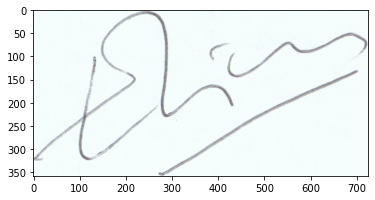

In [139]:
# real
img = mpimg.imread("../sign_data/train/001/001_01.PNG")
imgplot = plt.imshow(img, cmap="gray")
plt.show()

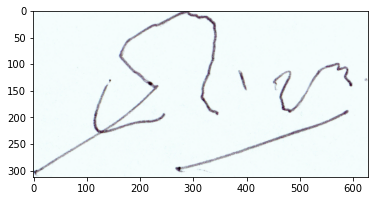

In [140]:
# forged
img = mpimg.imread("../sign_data/train/001_forg/0119001_01.png")
imgplot = plt.imshow(img)
plt.show()

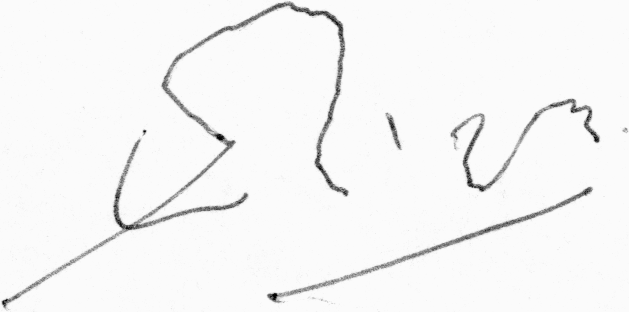

In [141]:
im = Image.open("../sign_data/train/001_forg/0119001_01.png").convert('L')
im
# or pil_im = Image.open('empire.jpg').convert('L')

In [142]:
type(im)

PIL.Image.Image

In [143]:
out = im.resize((256, 256))
np_im = np.array(out)
np_im

array([[251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       ...,
       [251, 240, 216, ..., 251, 250, 251],
       [247, 248, 233, ..., 251, 251, 251],
       [249, 251, 248, ..., 251, 251, 251]], dtype=uint8)

In [144]:
# are they all this size?
np_im.shape

(256, 256)

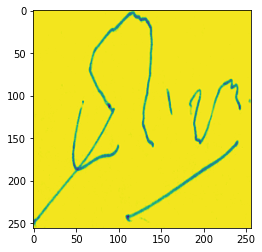

In [42]:
from pylab import *
imshow(out)

In [160]:
def get_img_list(path):
    """  return a list of filenames for
    all png images in a directory. """

    return [os.path.join(path, f) for f in os.listdir(path) if (f.endswith('.png') or f.endswith('.PNG'))]

In [161]:
get_img_list("../sign_data/train/001_forg")

['../sign_data/train/001_forg/0201001_01.png',
 '../sign_data/train/001_forg/0119001_04.png',
 '../sign_data/train/001_forg/0201001_03.png',
 '../sign_data/train/001_forg/0201001_02.png',
 '../sign_data/train/001_forg/0119001_01.png',
 '../sign_data/train/001_forg/0119001_02.png',
 '../sign_data/train/001_forg/0119001_03.png',
 '../sign_data/train/001_forg/0201001_04.png']